# preliminary data
Just playing around w/ effects of eye blinks and stuff here to determine what our experimental setup shall be.


In [10]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
data_path = '../DataCollection/data/user0song0.json'

In [3]:
with open(data_path) as json_file:
    data = json.load(json_file)

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,genre,song,user,attention,meditation,raw_eeg
0,mus,helpless,0,13,61,-86
1,mus,helpless,0,13,61,-168
2,mus,helpless,0,13,61,-275
3,mus,helpless,0,13,61,-184
4,mus,helpless,0,13,61,-8
...,...,...,...,...,...,...
15355,mus,helpless,0,48,100,81
15356,mus,helpless,0,48,100,83
15357,mus,helpless,0,48,100,102
15358,mus,helpless,0,48,100,35


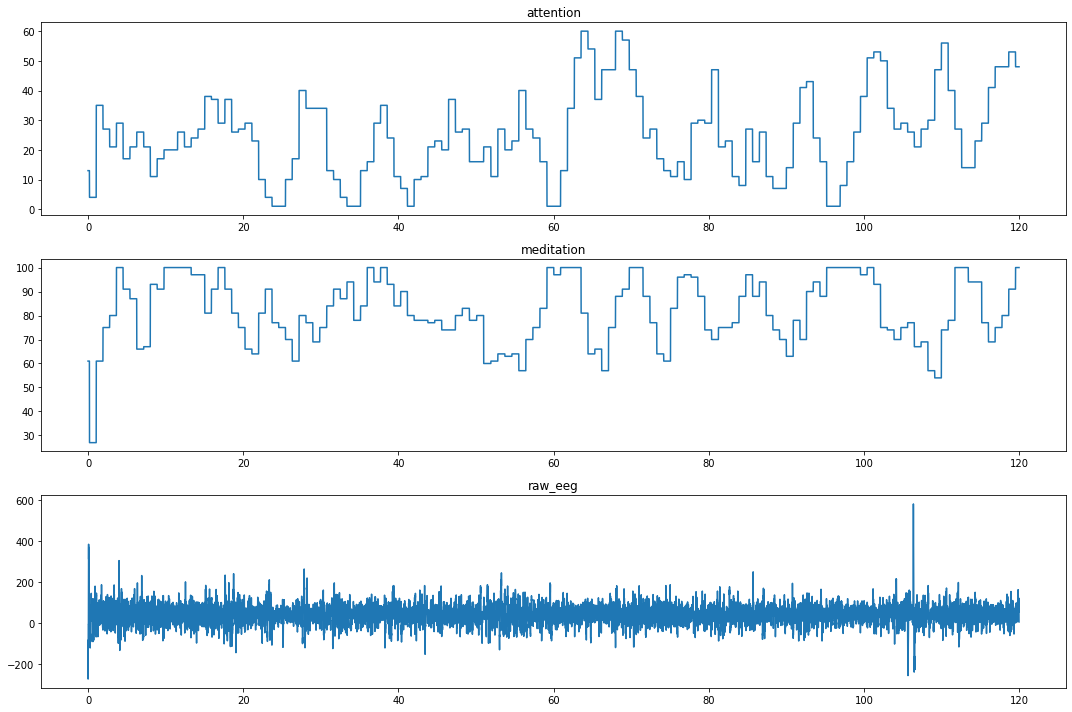

In [20]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
for i,d in enumerate(['attention','meditation','raw_eeg']):
    ax[i].plot(np.arange(0,120,1/128), df[d])
    ax[i].set_title(d)
plt.tight_layout()

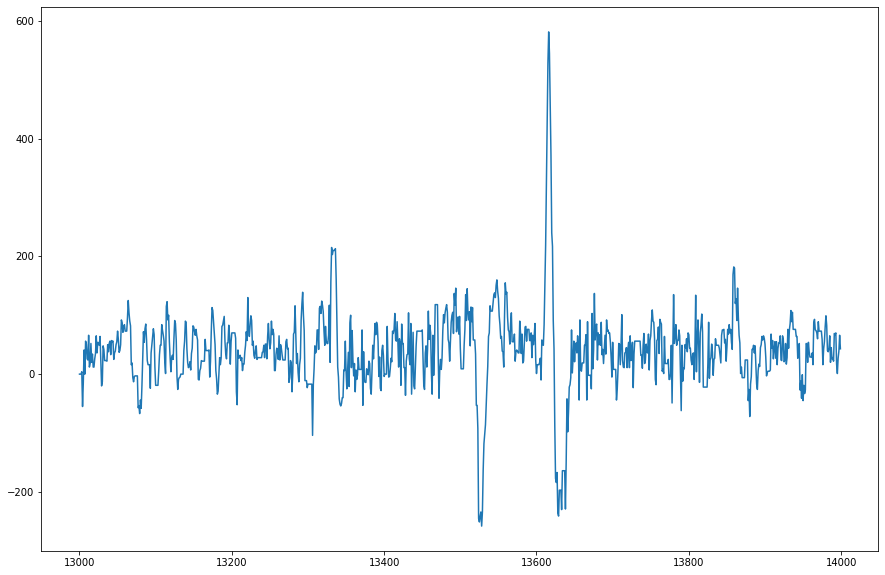

In [7]:
# eyes were closed most of trial, this is where I opened my eyes during the trial

plt.figure(figsize=(15,10))
plt.plot(df['raw_eeg'][13000:14000])
plt.show()

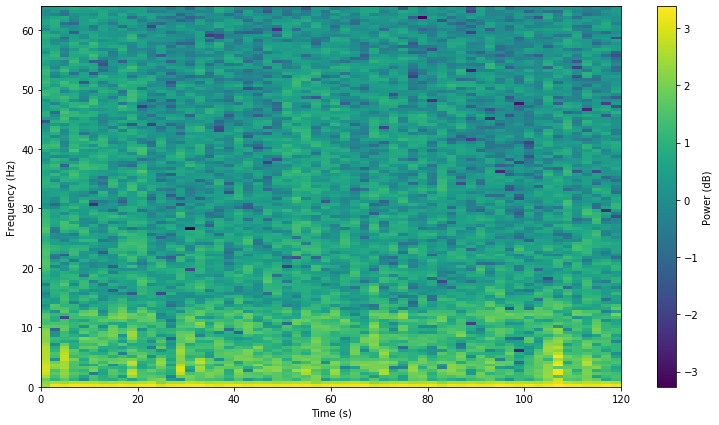

In [17]:
f,t,Zxx = signal.stft(df['raw_eeg'], fs=128, nperseg=2*128, noverlap=0) 
plt.figure(figsize=(13,7))
plt.pcolor(t, f, np.log10(np.abs(Zxx)**2)) 
plt.colorbar(label='Power (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()